In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Orbitron');
h1 {color:#3636ff; font-family:Orbitron; text-shadow:5px 5px 5px #aaa;}
a {color:#3636ff;}
div.output_area pre, div.output_area html {font-size:100%; color:#3636ff;}     
</style>

## For creating posts

 # Let's try to image uniformly distributed sequences
Jupyter Notebook & SageMath Kernel

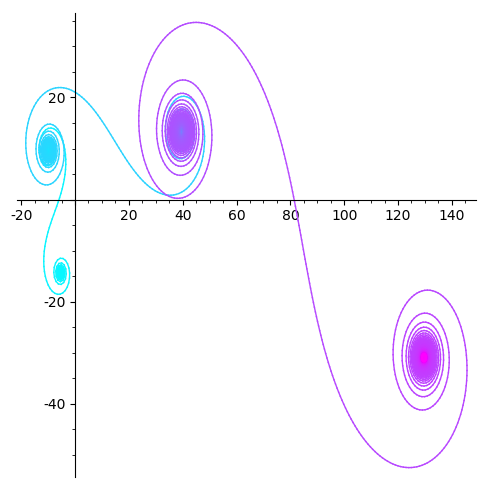

In [2]:
N = 10000; L = [CC(0,0)]; var('n'); 
c = [colormaps.cool((N^(-1)).n()*i)[:3] for i in [1..N]]
z = lambda n:exp(I*pi*n*ln(n/4)*2^0.5).n() 
for n in [1..N]: L.append(L[n-1]+CC(z(n))); 
sum([line([L[i],L[i+1]],color=c[i]) for i in [200..N-1]]).show(figsize=(5,5))

# If you want to improve this small and fun animation
Jupyter Notebook & SageMath Kernel

Animation with 25 frames
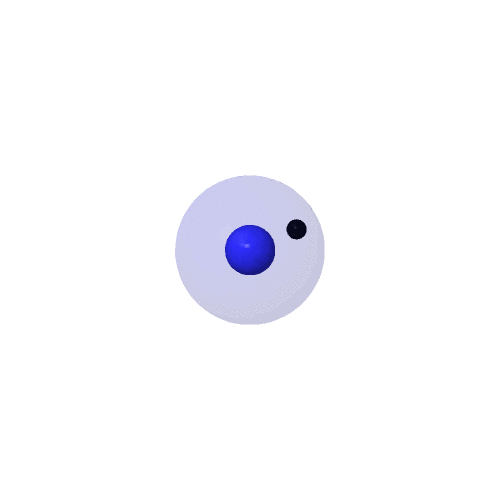

In [1]:
var('x,y,z'); from sage.plot.plot3d.shapes import Sphere
sphere12=Sphere(15,color='#3030ff',opacity=0.05).translate(0,0,0)+\
         Sphere(5,color='#3030ff').translate(0,0,0)
spheres=[sphere12+Sphere(2,color=(0.2*i,0,0.3*i))\
         .translate(0,13*cos(pi*i/12),7*sin(pi*i/12)) for i in [0..24]]
animate(spheres,frame=False)

# If you want to create a fun animation for functions
Jupyter Notebook & SageMath Kernel

Animation with 80 frames
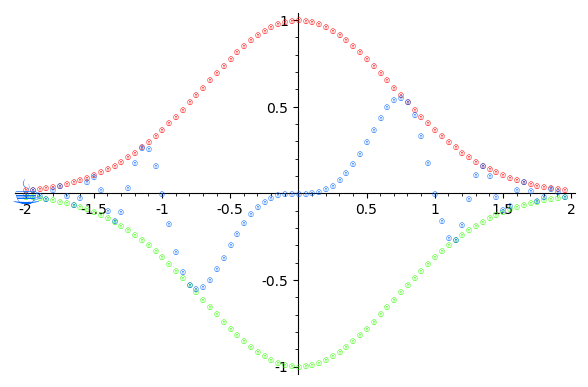

In [10]:
X=[x for x in srange(-2,2,0.05)]; Y=[exp(-x^2)*sin(pi*x^3) for x in X]; 
Y1,Y2=[exp(-x^2) for x in X],[-exp(-x^2) for x in X]
m,M='◎'.decode('utf-8'),'☕'.decode('utf-8'); c=[hue(0.3*i) for i in [0..2]]
t=sum([text(m,(x,y),fontsize=5,rgbcolor=c[i]) for i in [0..2] \
       for (x,y) in list(zip(X,[Y1,Y2,Y][i]))])
animate([t+text(M,(x,y),fontsize=25,rgbcolor=c[2]) for (x,y) in list(zip(X,Y))])

# When you want to imagine a "knot" curve
Jupyter Notebook & SageMath Kernel

In [11]:
@interact
def _(a=[10,15,20],b=[2,4,6],c=[15,10,5]):
    d=0.1; e=0.4; f=0.2; g=0.3; var('t')
    pretty_print('x = -%.1f*cos(%.1f*t)-%.1f*cos(%.1f*t)+%.1f*sin(%.1f*t))'%(a,d,b,e,c,f)) 
    pretty_print('y = -%.1f*cos(%.1f*t)+%.1f*sin(%.1f*t)-%.1f*sin(%.1f*t)'%(c,f,a,d,b,e))
    pretty_print('z = %.1f*cos(%.1f*t)'%(a,g))
    def L(i): return (-a*cos(d*i)-b*cos(e*i)+c*sin(f*i),-c*cos(f*i)+a*sin(d*i)-b*sin(e*i),a*cos(g*i))
    sum([line3d([L(i),L(i+1)],color=colormaps.winter(4*i)[:3],radius=.5) for i in [0..64]]).show(frame=False)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxOWZmYjIwNTA+IHdpdGggMyB3aWRnZXRzCiAgYTogRHJvcGRvd24oZGVzY3JpcHRpb249dSdhJywgb3B0aW9ucz0oMTAsIDHigKY=


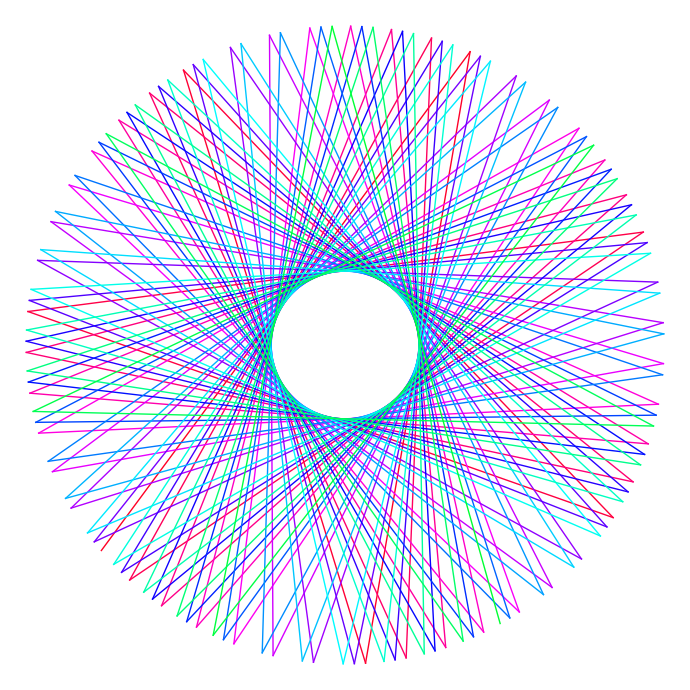

In [1]:
@interact
def _(N=(50,200,25)):
    L = [CC(0,0)]; var('n'); z = lambda n:exp(I*pi*n*2^0.2).n()
    c = [colormaps.hsv_r((200^(-1)).n()*i)[:3] for i in [1..200]]
    for n in [1..N]: L.append(L[n-1]+CC(z(n))); 
    sum([line([L[i],L[i+1]],color=c[i]) for i in [1..N-1]]).show(figsize=(7,7),axes=False)

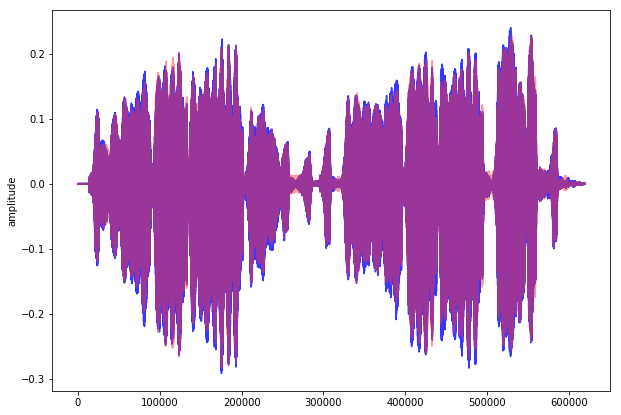

In [46]:
import numpy,pylab; from scipy.io import wavfile
fn = open('../OlgaBelitskaya/OlgaBelitskaya.github.io/slideflute.wav','r')
sr, wav = wavfile.read(fn); fn.close() 
wav = wav.astype('float')/numpy.iinfo(numpy.int16).max
f,ax = pylab.subplots(1,figsize=(10,7));
ax.plot(wav[:,1],c='#3636ff'); ax.plot(wav[:,0],c='#ff3636',alpha=0.5);
ax.set_ylabel('amplitude'); pylab.show()

## Additional material

In [3]:
@interact
def _(n=(1,11,1)):
    var('x'); f=[exp(-x^2)*sin(pi*x^n),exp(-x^2),-exp(-x^2)]
    sum([plot(f[i],(-2,2),color=hue(0.3*i),gridlines=True) for i in [0..2]]).show(figsize=(7,5))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxODEzZDU2Njg+IHdpdGggMSB3aWRnZXQKICBuOiBJbnRTbGlkZXIodmFsdWU9NiwgZGVzY3JpcHRpb249dSduJywgbWF4PTHigKY=
